In [361]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [388]:
df = pd.read_csv('crop_production.csv',index_col='index', parse_dates=['TIME'])
df.rename({'SUBJECT':'CROPS','MEASURE':'UNIT'}, axis=1, inplace=True)
df = df.drop(columns=['Flag Codes'])
del df['FREQUENCY']
del df['INDICATOR']

df['TIME'] = pd.to_datetime(df['TIME']) 
df['Year'] = df['TIME'].dt.year


#Filter data for years 1990 to 2000
df = df[(df['Year'] >= 1990) & (df['Year'] <= 2025)]
crop = ['RICE','WHEAT']
location=['IND','BRA','JPN']
df= df[df['CROPS'].isin(crop)] 
df = df[df['LOCATION'].isin(location)]

# Encode 'Crop' and 'Location'
label_encoder_crop = LabelEncoder()
label_encoder_location = LabelEncoder()

df['Crop_encoded'] = label_encoder_crop.fit_transform(df['CROPS'])
df['Location_encoded'] = label_encoder_location.fit_transform(df['LOCATION'])

# Aggregate data by year
aggregated_data = df.groupby('Year', as_index=False)['Value'].mean()  # Calculate the mean for each year

aggregated_data = pd.merge(aggregated_data, df[['Year', 'Crop_encoded', 'Location_encoded']].drop_duplicates(), on='Year')

# Basic Descriptive Statistics
print("Basic Descriptive Statistics:")
df.describe()


Basic Descriptive Statistics:


,TIME,Value,Year,Crop_encoded,Location_encoded
count,648,648.000000,648.00000,648.000000,648.000000
mean,2007-07-02 18:00:00,15353.506148,2007.50000,0.500000,1.000000
min,1990-01-01 00:00:00,1.153974,1990.00000,0.000000,0.000000
25%,1998-10-01 18:00:00,4.007336,1998.75000,0.000000,0.000000
50%,2007-07-02 12:00:00,1749.246000,2007.50000,0.500000,1.000000
75%,2016-04-01 12:00:00,8712.529911,2016.25000,1.000000,2.000000
max,2025-01-01 00:00:00,125329.670400,2025.00000,1.000000,2.000000
std,NaN,28723.422322,10.39632,0.500386,0.817127


In [366]:
df.head()

,LOCATION,CROPS,UNIT,TIME,Value,Year,Crop_encoded,Location_encoded
index,,,,,,,,
180,JPN,WHEAT,TONNE_HA,1990-01-01,3.655914,1990,0,2
181,JPN,WHEAT,TONNE_HA,1991-01-01,3.179724,1991,0,2
182,JPN,WHEAT,TONNE_HA,1992-01-01,3.538462,1992,0,2
183,JPN,WHEAT,TONNE_HA,1993-01-01,3.474946,1993,0,2
184,JPN,WHEAT,TONNE_HA,1994-01-01,3.719552,1994,0,2


In [368]:
aggregated_data.head()

,Year,Value,Crop_encoded,Location_encoded
0,1990,8927.345595,0,2
1,1990,8927.345595,0,0
2,1990,8927.345595,0,1
3,1991,9474.763051,0,2
4,1991,9474.763051,0,0


In [380]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              108 non-null    int32  
 1   Value             108 non-null    float64
 2   Crop_encoded      108 non-null    int32  
 3   Location_encoded  108 non-null    int32  
dtypes: float64(1), int32(3)
memory usage: 2.2 KB


In [372]:
aggregated_data.describe()

,Year,Value,Crop_encoded,Location_encoded
count,108.000000,108.000000,108.0,108.000000
mean,2007.500000,12769.866479,0.0,1.000000
std,10.436725,2184.600887,0.0,0.820303
min,1990.000000,8927.345595,0.0,0.000000
25%,1998.750000,11172.972269,0.0,0.000000
50%,2007.500000,12611.174143,0.0,1.000000
75%,2016.250000,14864.326172,0.0,2.000000
max,2025.000000,16069.222717,0.0,2.000000


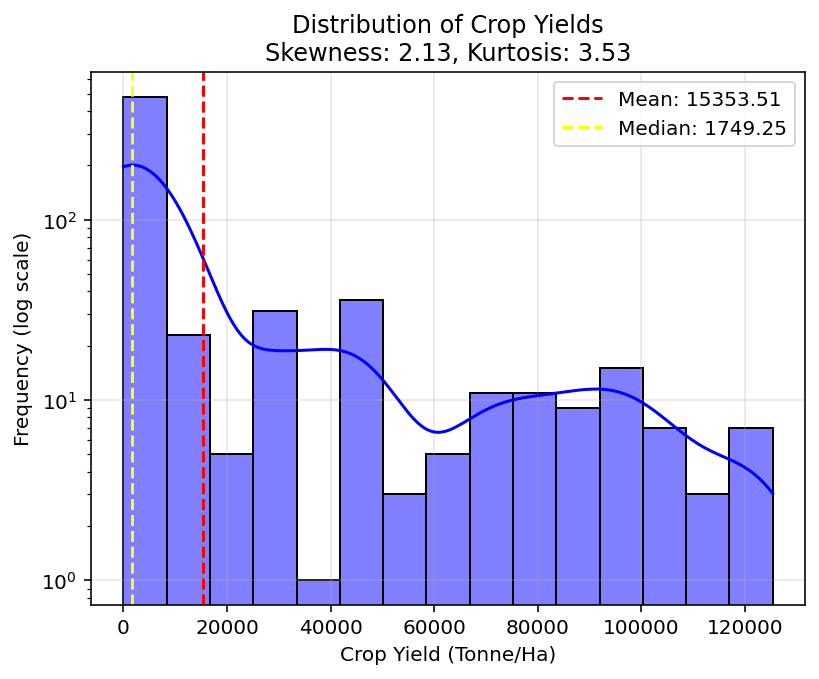

In [414]:
def plot_histogram(data):
    plt.figure(dpi=144)
    sns.histplot(data['Value'], bins=15, kde=True, color='blue', edgecolor='black')
    
    mean_value = data['Value'].mean()
    median_value = data['Value'].median()
    std_dev = data['Value'].std()
    skewness = skew(data['Value'])
    kurt = kurtosis(data['Value'])
    
    # mean and median lines
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {mean_value:.2f}")
    plt.axvline(median_value, color='yellow', linestyle='dashed', linewidth=1.5, label=f"Median: {median_value:.2f}")
    
    # Title with skewness and kurtosis
    plt.title(f'Distribution of Crop Yields\nSkewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')
    plt.xlabel('Crop Yield (Tonne/Ha)')
    plt.ylabel('Frequency (log scale)')
    
    # Use log scale for y-axis
    plt.yscale('log')
    
    # Grid and legend
    plt.grid(alpha=0.3)
    plt.legend()
    plt.savefig("histogram.png")
    plt.show()

# Call the enhanced function with your dataset
plot_histogram(df)



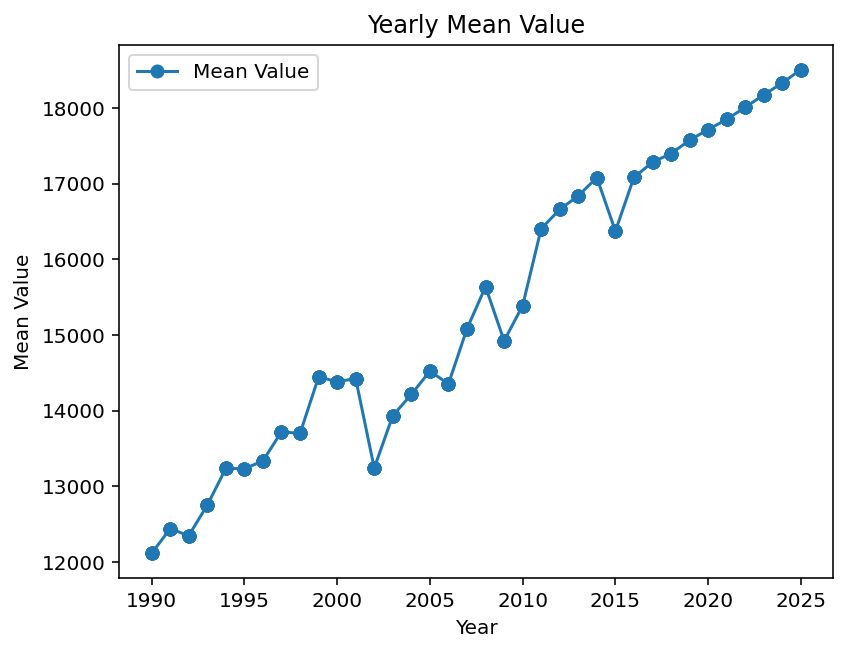

In [434]:
# 2. Plot aggregated data (line plot)
fig, ax = plt.subplots(dpi=144)
ax.plot(aggregated_data['Year'], aggregated_data['Value'], marker='o', label='Mean Value')
#ax.set_yscale('log')  # Use logarithmic scale for y-axis
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Yearly Mean Value')
ax.legend()
plt.show()

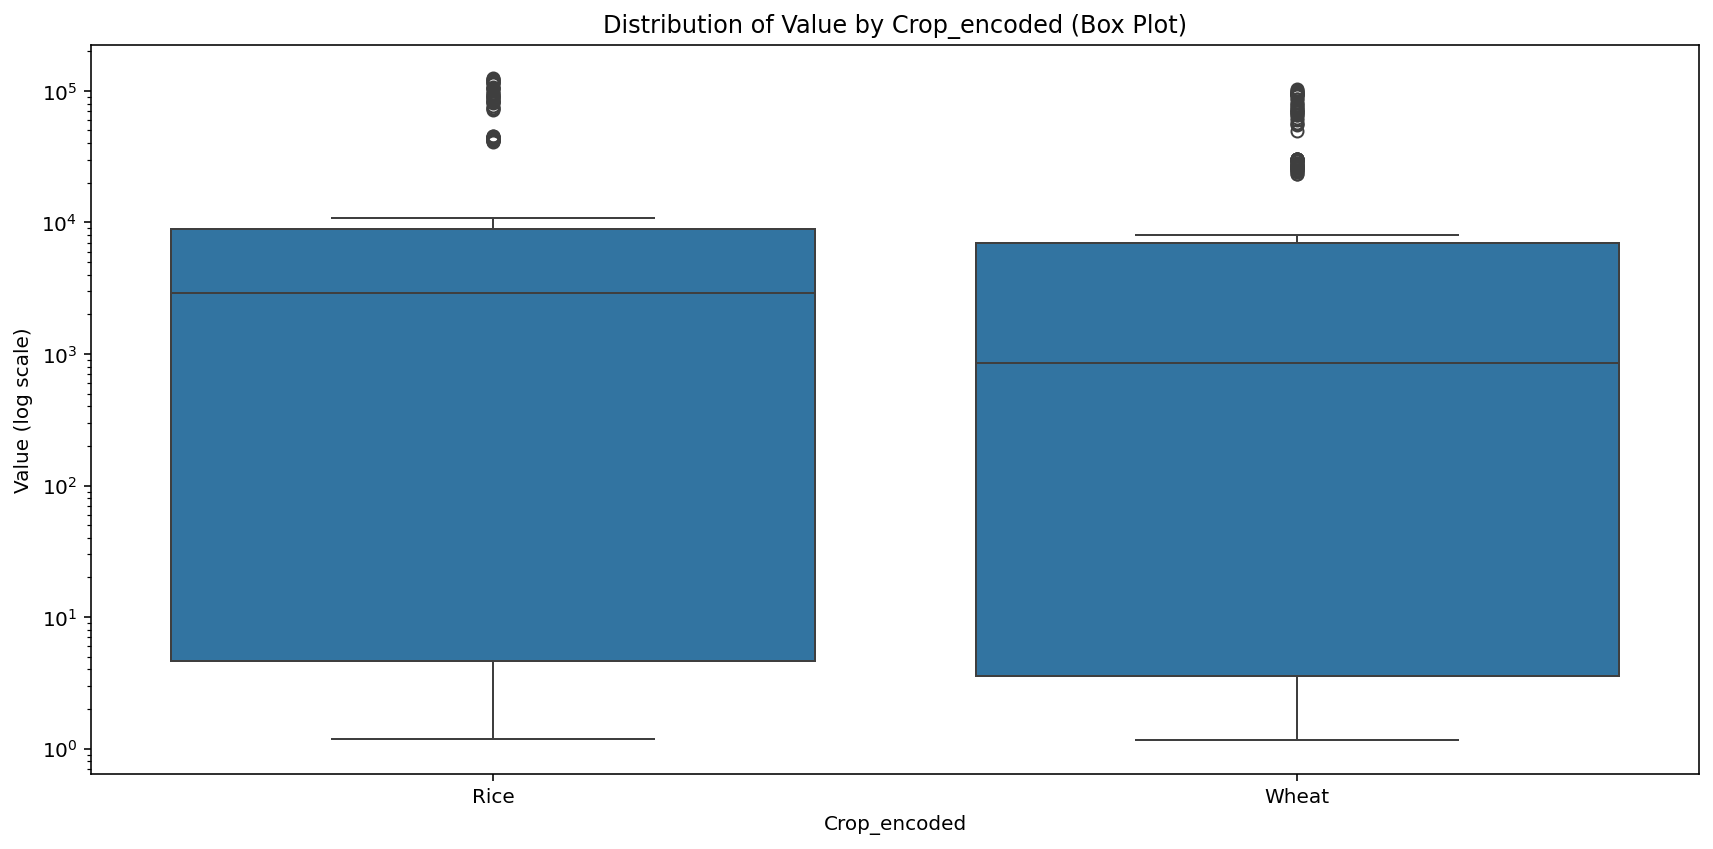

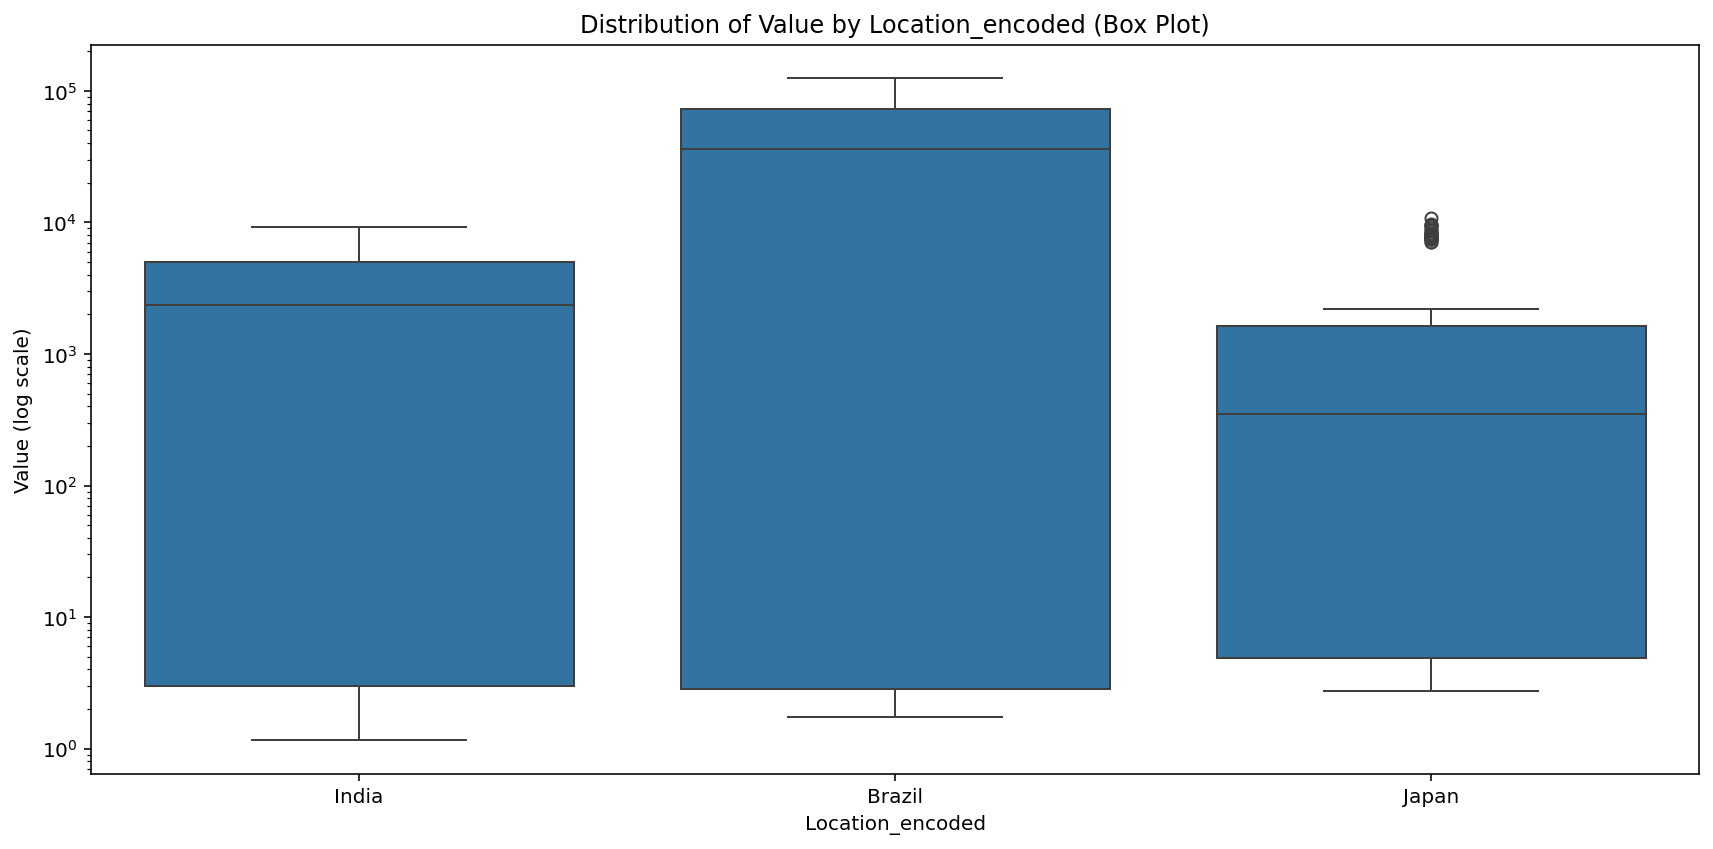

In [430]:
def plot_box_by_year(df, x_col, y_col, log_scale=False, figsize=(12, 6), dpi=144, x_labels=None, output_file=None):
    fig, ax = plt.subplots(figsize=figsize, dpi=144)
    sns.boxplot(x=x_col, y=y_col, data=df, ax=ax)
    
    if log_scale:
        ax.set_yscale('log')
    
    if x_labels:
        # Get unique values from the data
        unique_values = sorted(df[x_col].unique())
        ax.set_xticks(range(len(unique_values)))
        ax.set_xticklabels([x_labels[val] for val in unique_values])
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(f'{y_col} ({"log scale" if log_scale else "linear scale"})')
    ax.set_title(f'Distribution of {y_col} by {x_col} (Box Plot)')
    
    plt.tight_layout()  # Add this to prevent label cutoff
    
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')  # Add bbox_inches='tight' for better spacing
    plt.show()

# Example Usage
# Plot for crops
crop_labels = {0: 'Rice', 1: 'Wheat'}
plot_box_by_year(
    df, 
    x_col='Crop_encoded', 
    y_col='Value', 
    log_scale=True, 
    x_labels=crop_labels, 
    output_file='boxplot-crop.png'
)

# Plot for locations
location_labels = {0: 'India', 1: 'Brazil', 2: 'Japan'}  # Changed 3 to 2 for Japan
plot_box_by_year(
    df, 
    x_col='Location_encoded', 
    y_col='Value', 
    log_scale=True, 
    x_labels=location_labels, 
    output_file='boxplot-location.png'
)


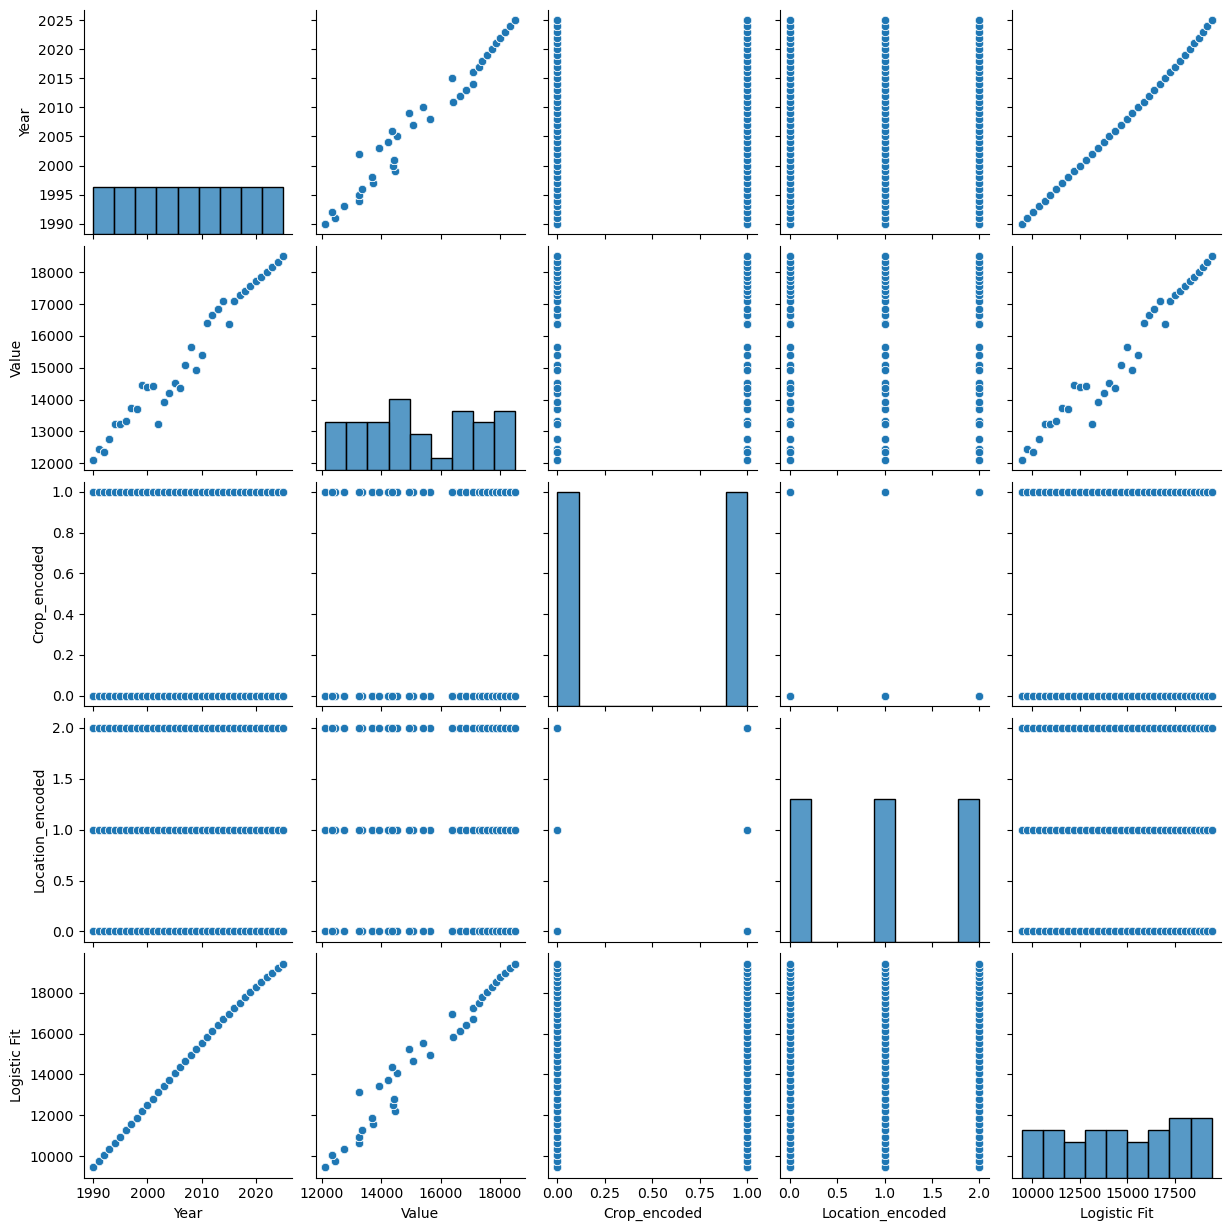

In [428]:
sns.pairplot(aggregated_data)
plt.show()

N0 = 25000 +/- 2356.81
g = 0.05 +/- 0.01
t0 = 2000.00 +/- 3.92


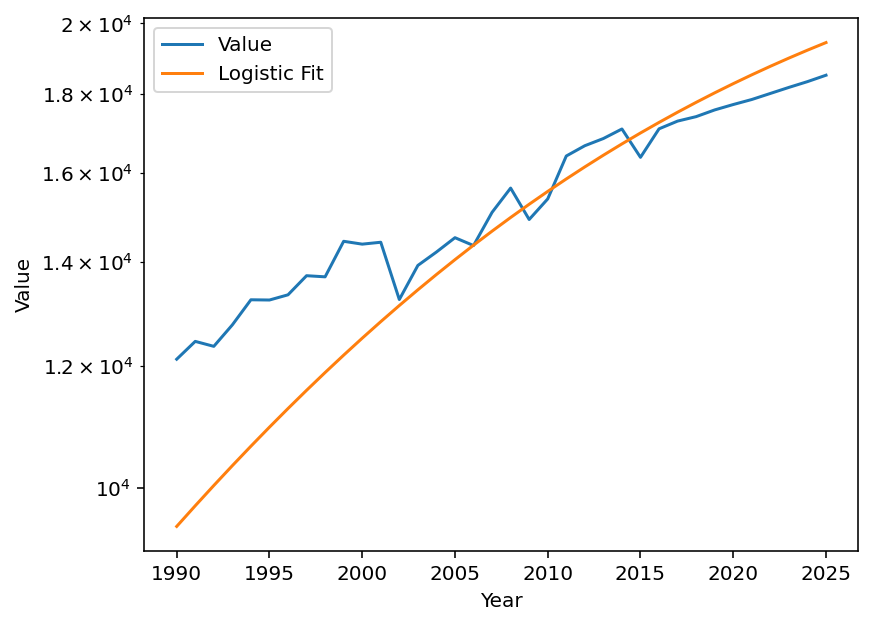

In [400]:
# Logistic function
def logistic(t, n0, g, t0):
    f = n0 / (1 + np.exp(-g * (t - t0)))
    return f

# Initial parameters
p0 = (18000, 0.2, 15)  # (n0, g, t0)
# Bounds with wider ranges
bounds = ([12000, 0.05, 10], [25000, 0.5, 20])

# Numeric index for the logistic function
numeric_index = (aggregated_data['Year'] - 1990).values

# Perform curve fitting
p, cov = curve_fit(logistic, numeric_index, aggregated_data['Value'], p0=p0, bounds=bounds)

# Standard deviations of the parameters
sigma = np.sqrt(np.diag(cov))

# Print fitted parameters and uncertainties
print(f"N0 = {p[0]:g} +/- {sigma[0]:g}")
print(f"g = {p[1]:.2f} +/- {sigma[1]:.2f}")
print(f"t0 = {p[2] + 1990:.2f} +/- {sigma[2]:.2f}")

# Add logistic fit to the data
aggregated_data['Logistic Fit'] = logistic(numeric_index, *p)

# Plot results
fig, ax = plt.subplots(dpi=144)
aggregated_data.plot(x='Year', y=['Value', 'Logistic Fit'], ax=ax, ylabel='Value')
ax.set_yscale('log')
plt.savefig('line-fit.png')
plt.show()

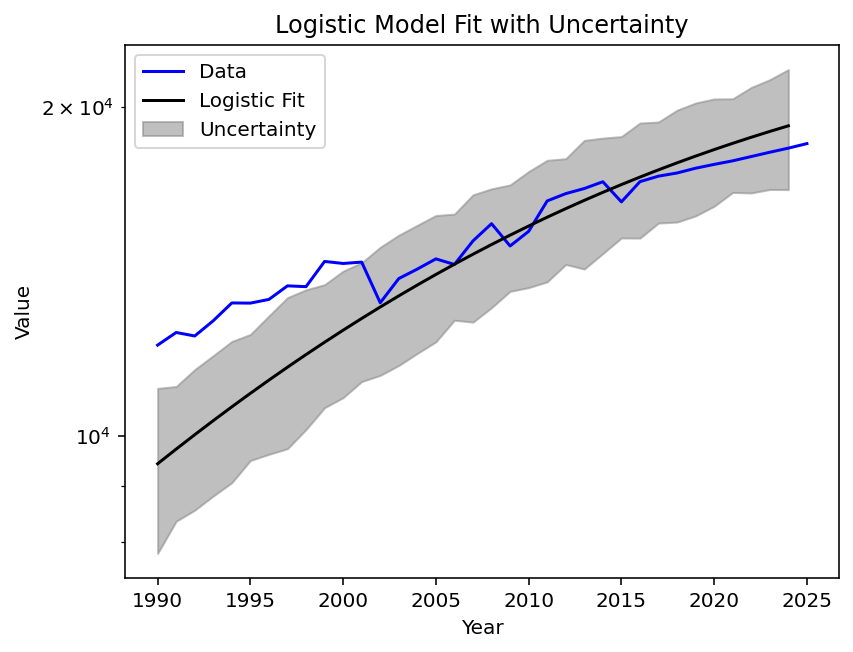

In [281]:
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Normalize years to improve numerical stability
x_data = aggregated_data['Year'] - 1990
y_data = aggregated_data['Value']

# Adjusted initial parameters based on the actual data trend
p0 = [19000,  # L: carrying capacity (max value showing ~18500)
      0.15,   # k: slower growth rate to match data trend
      15]     # x0: midpoint (around 2005, so 15 years after 1990)

# Adjusted bounds to allow more realistic values
bounds = ([15000, 0.05, 10], [25000, 0.3, 20])

# Fit with better numerical stability
popt_log, pcov = curve_fit(logistic, x_data, y_data, 
                          p0=p0, 
                          bounds=bounds,
                          method='trf',
                          maxfev=20000)

# Create prediction timeline
time_predictions = np.arange(0, 35, 1)  # 1990-2025 (shorter prediction window)
predictions = logistic(time_predictions, *popt_log)

# Calculate uncertainties (if covariance matrix is valid)
try:
    perr = np.sqrt(np.diag(pcov))
    uncertainties = np.array([
        np.std([logistic(t, *(popt_log + np.random.normal(0, perr))) 
                for _ in range(100)])
        for t in time_predictions
    ])
except:
    uncertainties = np.zeros_like(predictions)

# Plot
fig, ax = plt.subplots(dpi=144)
ax.plot(x_data + 1990, y_data, 'b-', label='Data')
ax.plot(time_predictions + 1990, predictions, 'k-', label='Logistic Fit')
ax.fill_between(time_predictions + 1990, 
                predictions - uncertainties,
                predictions + uncertainties, 
                color='gray', alpha=0.5,
                label='Uncertainty')

ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_yscale('log')
ax.set_title('Logistic Model Fit with Uncertainty')
ax.legend()
plt.show()


In [287]:
# Preparing data for clustering
df_clust = aggregated_data[['Year', 'Value']].copy()   

scaler = MinMaxScaler()
# Apply the scaler to the selected columns and transform the data.
norm = scaler.fit_transform(df_clust)  
def plot_elbow_method(min_k, max_k, wcss, best_n):

    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    # Plot the WCSS values
    k_values = range(min_k, max_k + 1)
    ax.plot(k_values, wcss, 'bo-', label='WCSS', markersize=8, linewidth=2)
    
    # Highlight the best k
    ax.scatter(best_n, wcss[best_n - min_k], color='red', edgecolor='black', s=100, zorder=5, label=f'Best k = {best_n}')
    ax.annotate(
        f'k={best_n}',
        xy=(best_n, wcss[best_n - min_k]),
        xytext=(best_n, wcss[best_n - min_k] + (max(wcss) - min(wcss)) * 0.05),
        fontsize=12,
        color='red',
        ha='center',
        arrowprops=dict(facecolor='red', arrowstyle='->', lw=2)
    )
    
    # Customize axes and labels
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Method for Optimal k', fontsize=16)
    ax.set_xticks(k_values)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Legend
    ax.legend(fontsize=12)
    
    # Tight layout and display
    plt.tight_layout()
    plt.savefig('elbow_method.png')
    plt.show()

In [289]:
def one_silhoutte_inertia(n, xy):
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [291]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 2 clusters silhoutte score = 0.65


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 3 clusters silhoutte score = 0.59


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 4 clusters silhoutte score = 0.56


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 5 clusters silhoutte score = 0.56


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 6 clusters silhoutte score = 0.57


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 7 clusters silhoutte score = 0.57


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 8 clusters silhoutte score = 0.59


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 9 clusters silhoutte score = 0.63


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 clusters silhoutte score = 0.62
Best number of clusters =  2


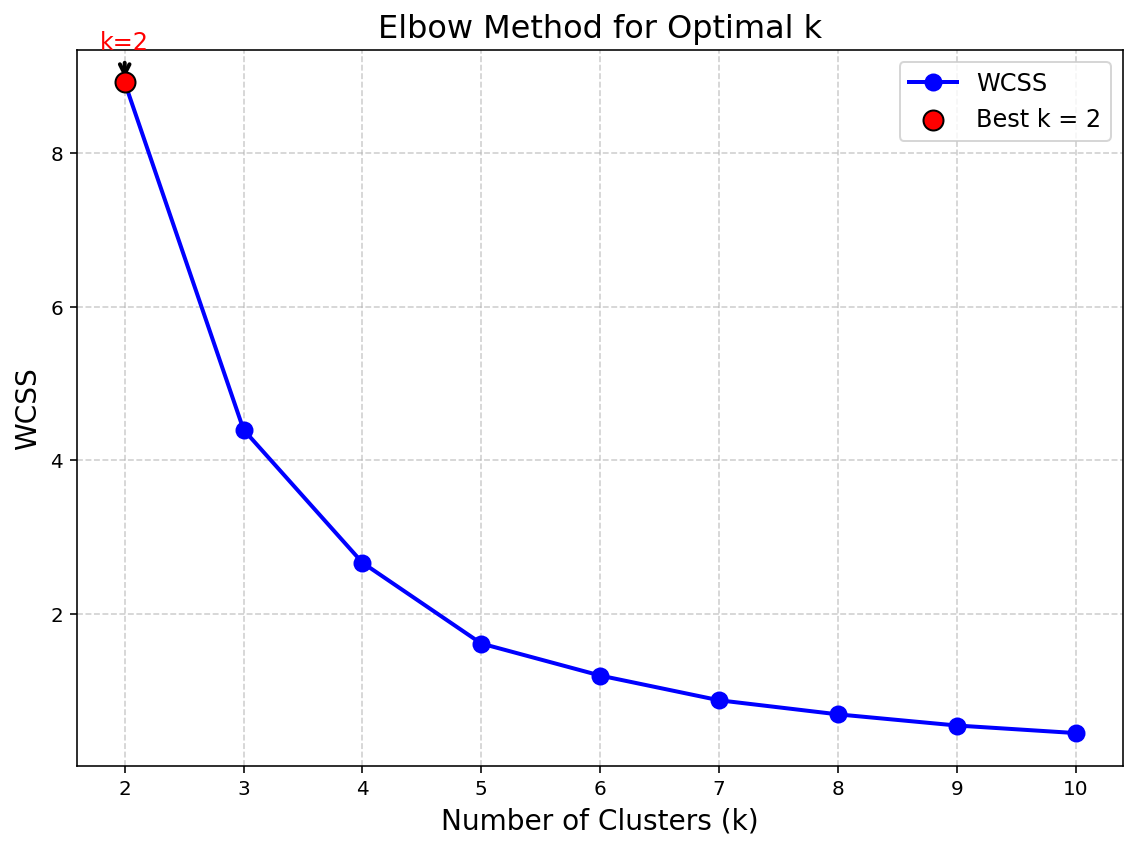

In [292]:
plot_elbow_method(2, 10, wcss, best_n)

In [295]:
def plot_clusters(labels, data, centers, x_centers, y_centers, center_labels, k):
    plt.figure(figsize=(8, 6))
    
    # Plot data points with cluster colors
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    
    # Highlight cluster centers
    plt.scatter(x_centers, y_centers, c='red', s=200, label='Cluster Centers', edgecolors='black')
    
    # Add cluster labels for centers
    for i, (x, y) in enumerate(zip(x_centers, y_centers)):
        plt.text(x, y, f'Center {center_labels[i]}', color='black', fontsize=9, ha='center', va='center')
    
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [299]:
def perform_kmeans(data, norm_data, scaler, k_range):
    for k in k_range:
        # Initialize and fit K-Means with the current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(norm_data)
        
        # Retrieve cluster labels and cluster centers
        labels = kmeans.labels_
        cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = cluster_centers[:, 0]
        y_centers = cluster_centers[:, 1]
        center_labels = kmeans.predict(kmeans.cluster_centers_)
        
        # Plot the results for the current k value
        plot_clusters(labels, data, cluster_centers, x_centers, y_centers, center_labels, k)

C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


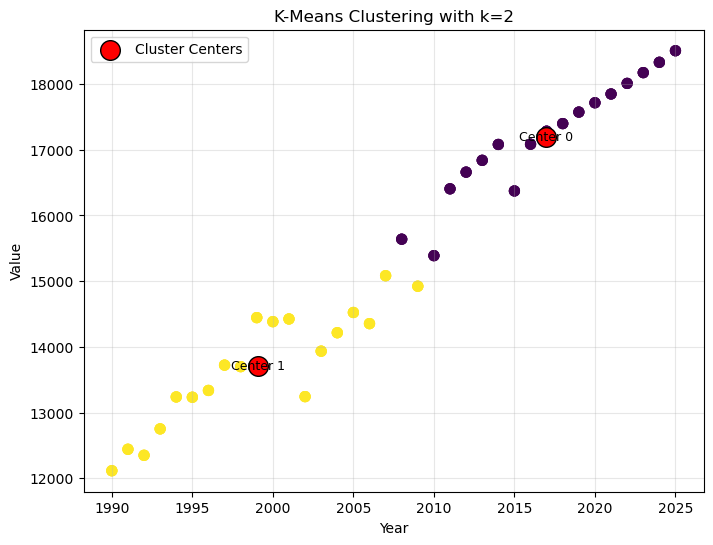

C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


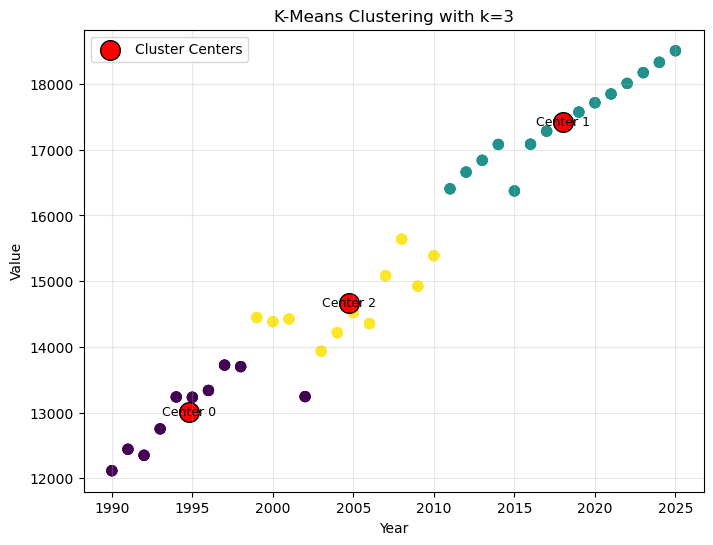

C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


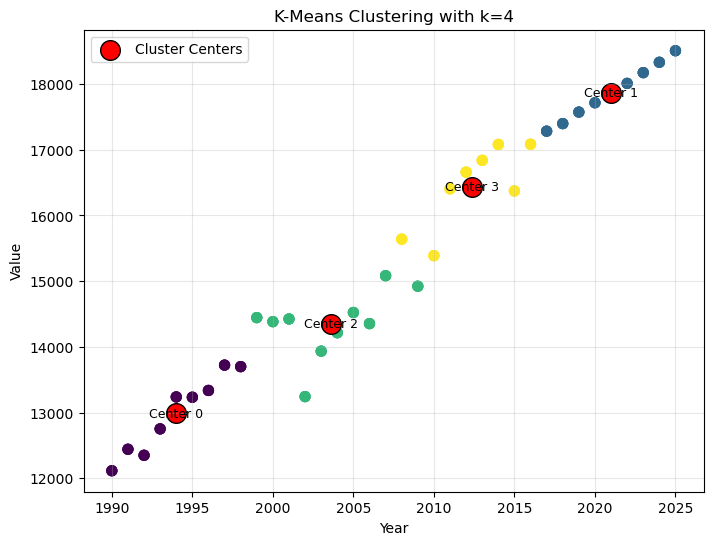

C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


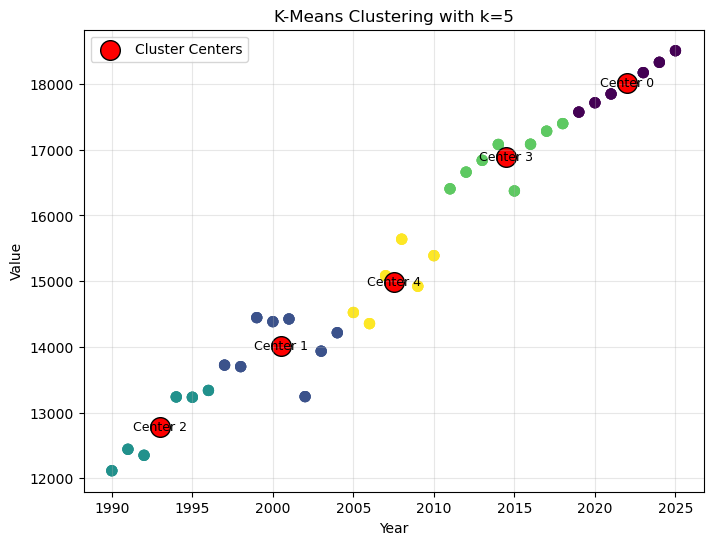

In [301]:
inv_norm = scaler.inverse_transform(norm)  # Important for accurate plotting of original data

# Perform KMeans for k values in the range 2
perform_kmeans(inv_norm, norm, scaler, k_range=range(2,6))
